In [2]:
f = open("./altfil","r")
lines = f.readlines()

In [3]:
header = lines[1].split()
nb_nodes = int(header[0])
nb_edges = int(int(header[1]) / 2)

padding_before_nodes = 4 
id_last_nodes = nb_nodes + padding_before_nodes - 1 
padding_before_edgee = 3 + id_last_nodes
print(id_last_nodes)

103


In [4]:
edges = []
for j in range(nb_edges):
    src , dst , a , b = lines[j + padding_before_edgee].split()
    edges.append((src, dst))

In [5]:
nodes = {}
gt_itm_types = []
for i in range(nb_nodes) :
    id, _ , x , y = lines[i + padding_before_nodes].split()
    gt_itm_types.append(_[0])
    nodes[int(id)] = int(x) ,int(y) 


In [6]:
print(gt_itm_types)

['T', 'T', 'T', 'T', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


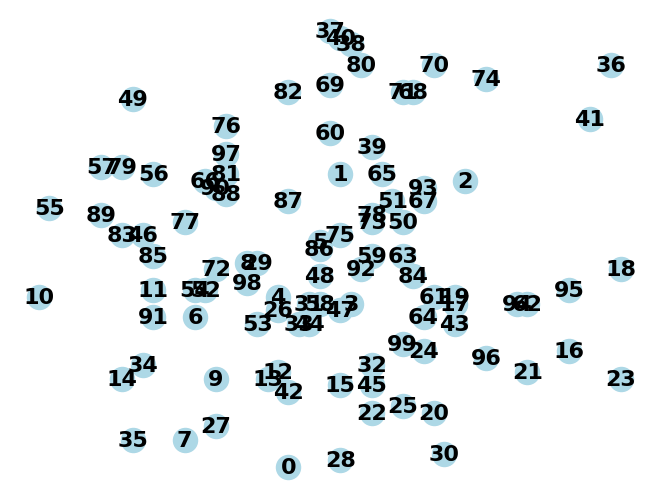

In [114]:

for i in nodes :
    pos = nodes[i]
    G.add_node(i, pos = pos)

pos=nx.get_node_attributes(G,'pos')

nx.draw(G, nodes, with_labels=True, node_color='lightblue', font_size=16, font_weight='bold')
plt.show()


In [18]:
import graphviz
from graphviz import Digraph, Graph
from sklearn.cluster import SpectralClustering
import numpy as np 
import pickle 

adj_mat = np.zeros((nb_nodes, nb_nodes))
edges_nodes = [36,39,41,62,43,64,57,56,52,50,48,47,46,92,99,96,14,13,8,11,10,27,35,32,31,28,6,25,16,21,18,22,72,68,74,73,77,79,83,81,86,85]
nodes_types = np.zeros((nb_nodes,))
g = Graph('G', engine="neato", filename='ex33.gv',format='pdf')
g.attr(size='7')
nsparse_adj_list = []
for i in nodes : 
    x,y = str(nodes[i][0]), str(nodes[i][1])
    pos=f"{x},{y}!"
    if i in edges_nodes : 
        g.node(str(i), color = "blue")
        nodes_types[i] = 1
    elif gt_itm_types[i] == "T" : 
        nodes_types[i] = 2 
    else : 
        g.node(str(i))

for j in edges : 
    src, dist = j
    src = int(src)
    dist = int(dist) 
    adj_mat[src, dist] = 1
    adj_mat[dist, src] = 1
    nsparse_adj_list.append([src, dist])
    g.edge(str(src),str(dist))




g.render()

'ex33.gv.pdf'

In [46]:
nb_clust = 10

sc = SpectralClustering(n_clusters=nb_clust+1, affinity= "precomputed")
mod = sc.fit_predict(adj_mat)

edges_clusters = {
    i : [] for i in range(nb_clust)
}

for i in edges_nodes :
    #print(f"Edge:{i} Cluser : {mod[i]}")
    edges_clusters[mod[i]].append(i)
for k in edges_clusters :
    print("Cluster "+str(k))
    print(edges_clusters[k])

Cluster 0
[27, 35, 32, 31, 28]
Cluster 1
[77, 79, 83, 81, 86, 85]
Cluster 2
[72, 68, 74, 73]
Cluster 3
[36, 39, 41]
Cluster 4
[57, 56, 52, 50]
Cluster 5
[14, 13, 8, 11, 10]
Cluster 6
[6, 25, 16, 21, 18, 22]
Cluster 7
[92, 99, 96]
Cluster 8
[62, 64]
Cluster 9
[43, 48, 47, 46]


In [47]:
for i in edges_nodes :
    print(f"Edge:{i} Cluser : {mod[i]}")

Edge:36 Cluser : 3
Edge:39 Cluser : 3
Edge:41 Cluser : 3
Edge:62 Cluser : 8
Edge:43 Cluser : 9
Edge:64 Cluser : 8
Edge:57 Cluser : 4
Edge:56 Cluser : 4
Edge:52 Cluser : 4
Edge:50 Cluser : 4
Edge:48 Cluser : 9
Edge:47 Cluser : 9
Edge:46 Cluser : 9
Edge:92 Cluser : 7
Edge:99 Cluser : 7
Edge:96 Cluser : 7
Edge:14 Cluser : 5
Edge:13 Cluser : 5
Edge:8 Cluser : 5
Edge:11 Cluser : 5
Edge:10 Cluser : 5
Edge:27 Cluser : 0
Edge:35 Cluser : 0
Edge:32 Cluser : 0
Edge:31 Cluser : 0
Edge:28 Cluser : 0
Edge:6 Cluser : 6
Edge:25 Cluser : 6
Edge:16 Cluser : 6
Edge:21 Cluser : 6
Edge:18 Cluser : 6
Edge:22 Cluser : 6
Edge:72 Cluser : 2
Edge:68 Cluser : 2
Edge:74 Cluser : 2
Edge:73 Cluser : 2
Edge:77 Cluser : 1
Edge:79 Cluser : 1
Edge:83 Cluser : 1
Edge:81 Cluser : 1
Edge:86 Cluser : 1
Edge:85 Cluser : 1


In [48]:
Graph_to_save = {
    "ADJ_MAT" : adj_mat,
    "NODES_TYPES" : nodes_types,
    "ADJ_LIST" : nsparse_adj_list,
    "EDGES_CLUSTERS" : edges_clusters,
}

with open("ts100.pkl","wb") as f : 
    pickle.dump(Graph_to_save, f)

In [35]:
g = Graph('G', engine="neato", filename='ex2.gv',format='pdf')
g.attr(size='7')
for i in nodes : 
    x,y = str(nodes[i][0]), str(nodes[i][1])
    pos=f"{x},{y}!"
    g.node(str(i), label= "Cluster :"+str(mod[i]))

for j in edges : 
    src, dist = j
    src = int(src)
    dist = int(dist) 
    g.edge(str(src),str(dist))




g.render()

NameError: name 'mod' is not defined